# Single model

This notebook goes through the solution and simulation of the single model. 

We ensure the correctness of the solution by visualizing consumption and value functions and calculating Euler errors.

We ensure the empirical validity of the model by simulating a lifecycle and calculating retirement probabilities

Finally we time the solution and simulation

### Setup

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import funs
import figs
import transitions

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Solution

In [2]:
test = RetirementClass()
test.solve()

In [5]:
test.simulate()

ZeroDivisionError: division by zero

### Random consumption functions for high skilled woman with ERP

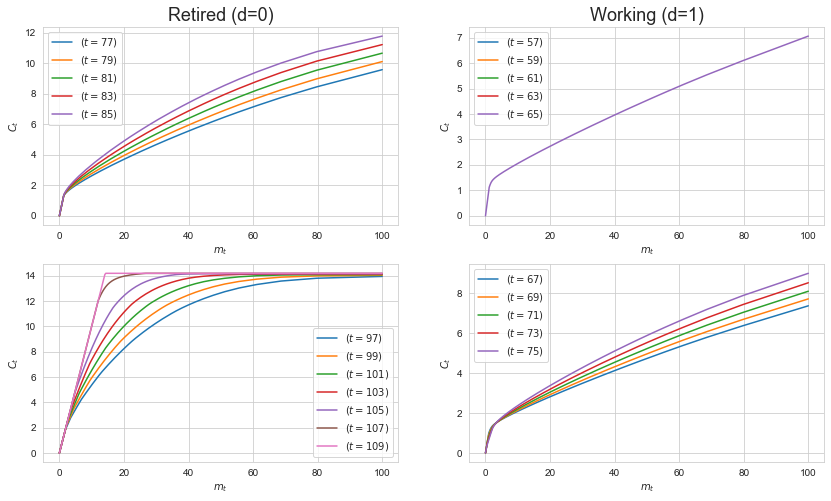

In [6]:
fig, axs = plt.subplots(2,2,figsize=(14,8))
time = list(range(20,30))
figs.policy(test,axs[0,0],var='c',T=time[::2],MA=[0],ST=[3],RA=[0],D=[0],label=['t'])
time = list(range(40,53))
figs.policy(test,axs[1,0],var='c',T=time[::2],MA=[0],ST=[3],RA=[0],D=[0],label=['t'])
time = list(range(10))
figs.policy(test,axs[0,1],var='c',T=time[::2],MA=[0],ST=[3],RA=[0],D=[1],label=['t'])
time = list(range(10,20))
figs.policy(test,axs[1,1],var='c',T=time[::2],MA=[0],ST=[3],RA=[0],D=[1],label=['t'])
axs[0,0].set_title('Retired (d=0)',size=18)
axs[0,1].set_title('Working (d=1)',size=18)
plt.show()

Zoom in on consumption functions for working

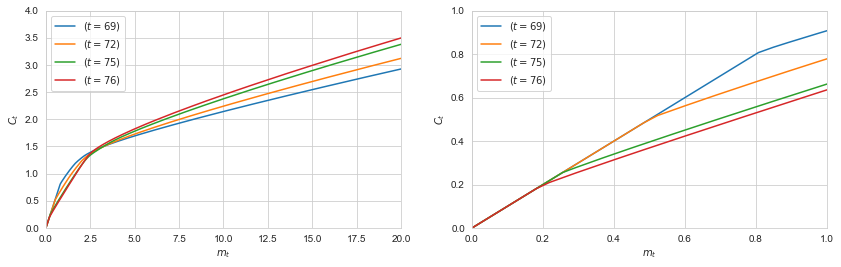

In [7]:
fig, axs = plt.subplots(1,2,figsize=(14,4))
figs.policy(test,axs[0],var='c',T=[12,15,18,19],MA=[0],ST=[3],RA=[0],D=[1],label=['t'],xlim=[0,20],ylim=[0,4])    
figs.policy(test,axs[1],var='c',T=[12,15,18,19],MA=[0],ST=[3],RA=[0],D=[1],label=['t'],xlim=[0,1],ylim=[0,1])
plt.show()

For low level of wealth consumption is larger, when young. However this effect is reversed for higher level of wealth

The reason is that labor income begin to decrease around age 60 (see below). Thus older individuals will have lower income, and therefore consume less for low level of wealth (they escape the constraint faster). However for high level of wealth the savings motive (saving for the future) is more important. Here older individuals have fewer future time periods and discount harder (due to lower survival probabilities), they will therefore consume more (save less).

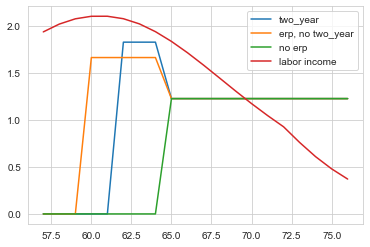

In [8]:
par = test.par
name = ['two_year', 'erp, no two_year', 'no erp']
T = 20
ages = transitions.age(np.arange(T),test.par)
post = np.zeros(T)
for t in range(T):
    pre = transitions.labor_pretax(t,0,3,par)
    post[t] = transitions.labor_posttax(t,pre,0,par,1)
for ra in [0,1,2]:
    plt.plot(ages, par.pension_arr[:T,0,0,ra,0], label=name[ra])
plt.plot(ages,post, label='labor income')
plt.legend()

### Zoom in on consumption functions around the ERP age for d=0 across different retirement status (ra)

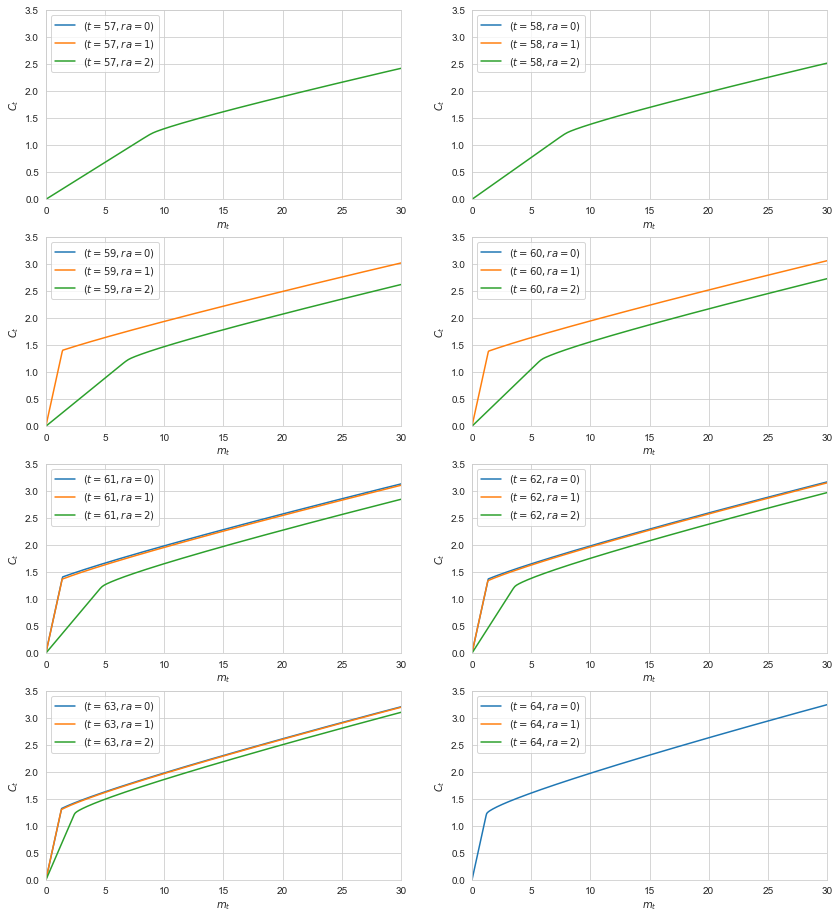

In [7]:
nrow = 4
ncol = 2
fig, axes = plt.subplots(nrow,ncol,figsize=(14,16))
axs = axes.flatten()
for t in range(nrow*ncol):        
    figs.policy(test,axs[t],var='c',T=[t],MA=[0],ST=[3],RA=[0,1,2],D=[0],label=['t','ra'],xlim=[0,30],ylim=[0,3.5])
plt.show()

### Average retirement probabilities

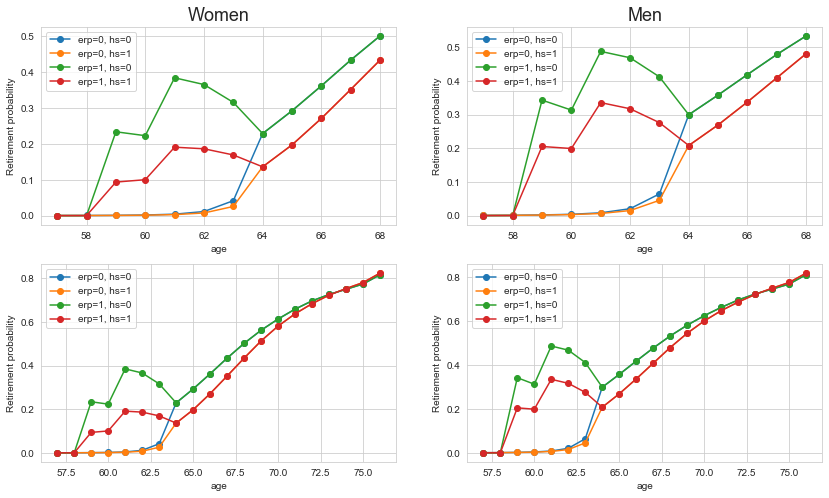

In [6]:
fig, axs = plt.subplots(2,2,figsize=(14,8))
figs.choice_probs(test,axs[0,0],AD=0,MA=0,ST=[0,1,2,3])
figs.choice_probs(test,axs[0,1],AD=0,MA=1,ST=[0,1,2,3])
figs.choice_probs(test,axs[1,0],AD=0,MA=0,ST=[0,1,2,3], ages=[57,77])
figs.choice_probs(test,axs[1,1],AD=0,MA=1,ST=[0,1,2,3], ages=[57,77])
axs[0,0].set_title('Women',size=18)
axs[0,1].set_title('Men',size=18)
plt.show()

# Simulate

### Initialized wealth distribution

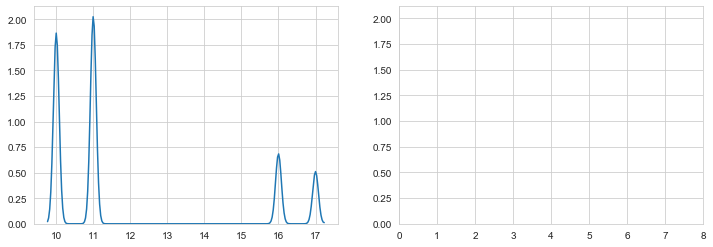

median: 11.0
mean:   11.91
std:    2.552


In [21]:
M_init = test.sim.m[0]
fig, axs = plt.subplots(1,2,figsize=(12,4))
sns.kdeplot(M_init,ax=axs[0],gridsize=200)
axs[1].set_xlim(0,8)
sns.kdeplot(M_init,ax=axs[1],gridsize=500)
plt.show()
print('median:',np.round(np.median(M_init),3))
print('mean:  ',np.round(np.mean(M_init),3))
print('std:   ',np.round(np.std(M_init),3))

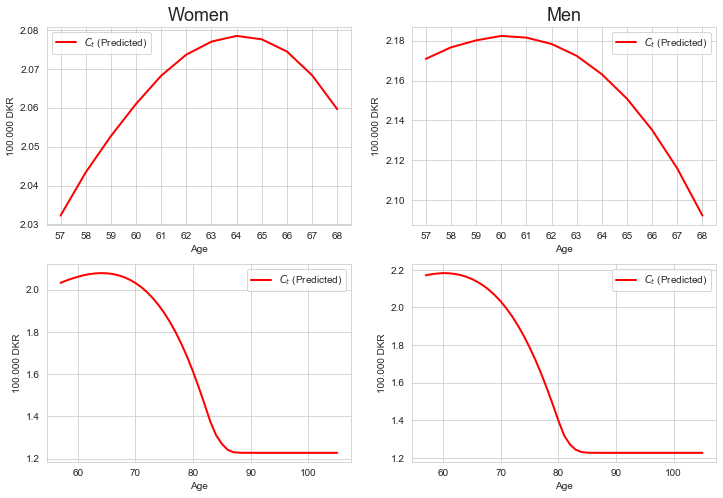

In [32]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.lifecycle(test,axs[0,0],ma=0,vars=['c'])
figs.lifecycle(test,axs[0,1],ma=1,vars=['c'])
figs.lifecycle(test,axs[1,0],ma=0,vars=['c'],ages=[57,110])
figs.lifecycle(test,axs[1,1],ma=1,vars=['c'],ages=[57,110])
axs[0,0].set_title('Women',size=18)
axs[0,1].set_title('Men',size=18)
plt.show()

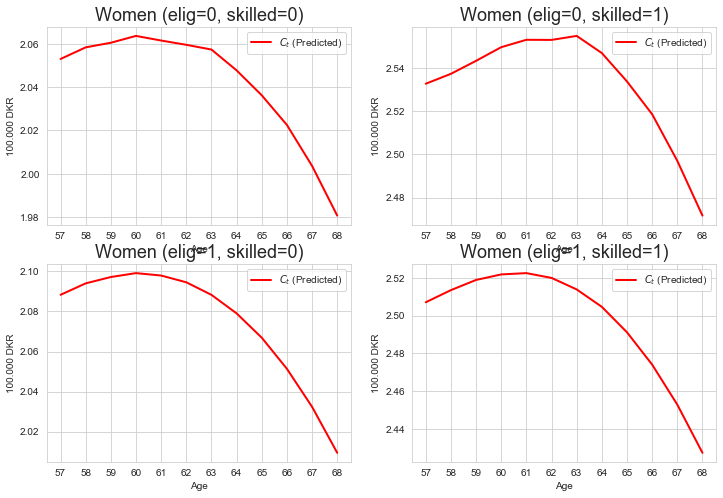

In [33]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.lifecycle(test,axs[0,0],vars=['c'],ma=1,ST=[0],ages=[57,68])
figs.lifecycle(test,axs[0,1],vars=['c'],ma=1,ST=[1],ages=[57,68])
figs.lifecycle(test,axs[1,0],vars=['c'],ma=1,ST=[2],ages=[57,68])
figs.lifecycle(test,axs[1,1],vars=['c'],ma=1,ST=[3],ages=[57,68])
axs[0,0].set_title('Women (elig=0, skilled=0)',size=18)
axs[0,1].set_title('Women (elig=0, skilled=1)',size=18)
axs[1,0].set_title('Women (elig=1, skilled=0)',size=18)
axs[1,1].set_title('Women (elig=1, skilled=1)',size=18)
plt.show()

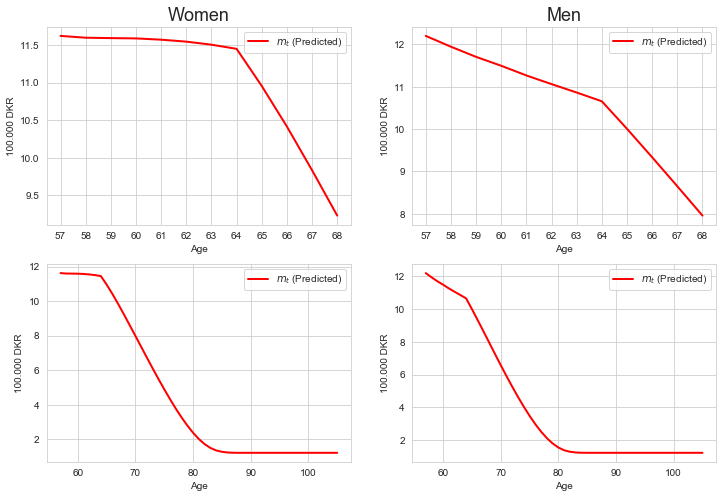

In [34]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.lifecycle(test,axs[0,0],ma=0,vars=['m'])
figs.lifecycle(test,axs[0,1],ma=1,vars=['m'])
figs.lifecycle(test,axs[1,0],ma=0,vars=['m'],ages=[57,110])
figs.lifecycle(test,axs[1,1],ma=1,vars=['m'],ages=[57,110])
axs[0,0].set_title('Women',size=18)
axs[0,1].set_title('Men',size=18)
plt.show()

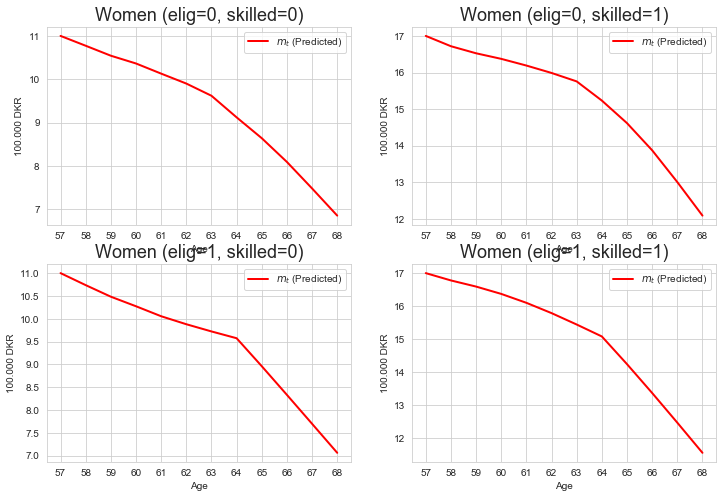

In [35]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.lifecycle(test,axs[0,0],vars=['m'],ma=1,ST=[0],ages=[57,68])
figs.lifecycle(test,axs[0,1],vars=['m'],ma=1,ST=[1],ages=[57,68])
figs.lifecycle(test,axs[1,0],vars=['m'],ma=1,ST=[2],ages=[57,68])
figs.lifecycle(test,axs[1,1],vars=['m'],ma=1,ST=[3],ages=[57,68])
axs[0,0].set_title('Women (elig=0, skilled=0)',size=18)
axs[0,1].set_title('Women (elig=0, skilled=1)',size=18)
axs[1,0].set_title('Women (elig=1, skilled=0)',size=18)
axs[1,1].set_title('Women (elig=1, skilled=1)',size=18)
plt.show()

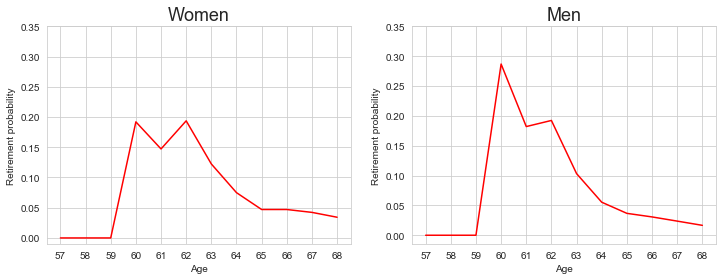

In [36]:
fig, axs = plt.subplots(1,2,figsize=(12,4))
figs.retirement_probs(test,axs[0],ma=0)
figs.retirement_probs(test,axs[1],ma=1)
axs[0].set_title('Women',size=18)
axs[1].set_title('Men',size=18)
plt.show()

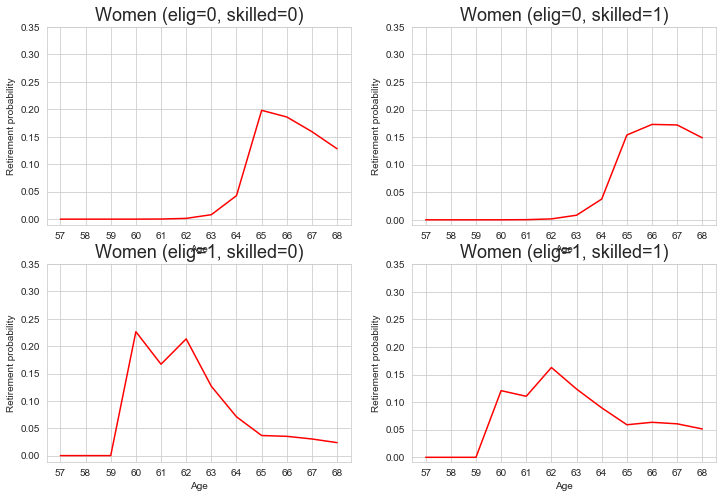

In [37]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.retirement_probs(test,axs[0,0],ma=0,ST=[0])
figs.retirement_probs(test,axs[0,1],ma=0,ST=[1])
figs.retirement_probs(test,axs[1,0],ma=0,ST=[2])
figs.retirement_probs(test,axs[1,1],ma=0,ST=[3])
axs[0,0].set_title('Women (elig=0, skilled=0)',size=18)
axs[0,1].set_title('Women (elig=0, skilled=1)',size=18)
axs[1,0].set_title('Women (elig=1, skilled=0)',size=18)
axs[1,1].set_title('Women (elig=1, skilled=1)',size=18)
plt.show()

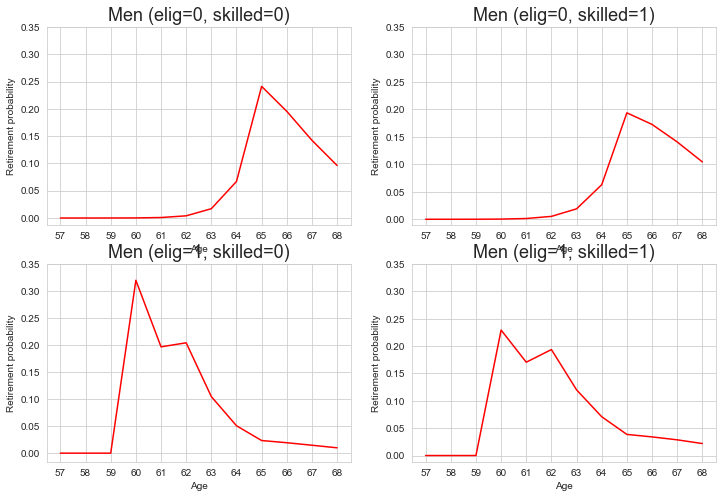

In [38]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
figs.retirement_probs(test,axs[0,0],ma=1,ST=[0])
figs.retirement_probs(test,axs[0,1],ma=1,ST=[1])
figs.retirement_probs(test,axs[1,0],ma=1,ST=[2])
figs.retirement_probs(test,axs[1,1],ma=1,ST=[3])
axs[0,0].set_title('Men (elig=0, skilled=0)',size=18)
axs[0,1].set_title('Men (elig=0, skilled=1)',size=18)
axs[1,0].set_title('Men (elig=1, skilled=0)',size=18)
axs[1,1].set_title('Men (elig=1, skilled=1)',size=18)
plt.show()

# Euler errors

### Plotting across states

Total: -5.89241504717765


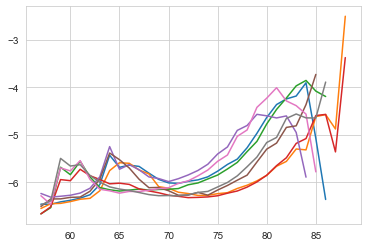

In [40]:
MA = [0,1]
ST = [0,1,2,3]
ages = [test.par.start_T,test.par.end_T-1]
for ma in MA:
    for st in ST:
        funs.log_euler(test,MA=[ma],ST=[st],ages=ages,plot=True)
print('Total:',funs.log_euler(test,ages=ages)[0])

### Can euler errors be improved?

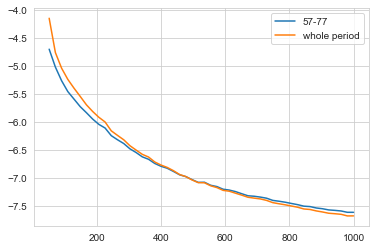

In [65]:
Na = test.par.Na
funs.resolve(test,Na=np.linspace(50,1000))
test.par.Na = Na
test.solve(recompute=True) # reset

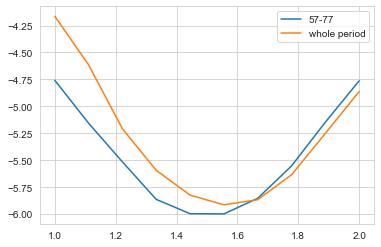

In [15]:
a_phi = test.par.a_phi
funs.resolve(test,a_phi = np.linspace(1.0,2.0,num=10))
test.par.a_phi = a_phi
test.solve(recompute=True) # reset

# Time the model and simulation

In [30]:
test.par.simT=20

In [31]:
def solve():
    test.solve() 
    
def simulate():
    test.simulate()
    
funcs = [solve,simulate]
argu = dict([(funcs[0], []),
             (funcs[1], [])])
names = dict([(funcs[0], 'solve: #a=' + str(test.par.Na)),
              (funcs[1], 'simulate: T=20, N=' + str(test.par.simN))])

In [69]:
funs.my_timer(funcs,argu,names,unit='s',ndigits=2,Ntimes=100)

time unit is: s
+--------------------------+------+--------+------+------+-------+
|           func           |  lq  | median | mean |  uq  | neval |
+--------------------------+------+--------+------+------+-------+
|      solve: #a=200       | 0.61 |  0.61  | 0.62 | 0.62 | 100.0 |
| simulate: T=20, N=100000 | 1.5  |  1.5   | 1.51 | 1.51 | 100.0 |
+--------------------------+------+--------+------+------+-------+
